In [61]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
plt.figure(figsize=(15,5))

<Figure size 1080x360 with 0 Axes>

<Figure size 1080x360 with 0 Axes>

In [8]:
df=pd.read_csv('Bank_Campaign.csv', sep=';')

# Data

In [9]:
print(f"There are {df.shape[0]} rows and {df.shape[1]} columns.")
print(f"There are {df.isna().sum().sum()} missing values.")

There are 41188 rows and 21 columns.
There are 0 missing values.


In [10]:
df.isna().sum()

age               0
job               0
marital           0
education         0
default           0
housing           0
loan              0
contact           0
month             0
day_of_week       0
duration          0
campaign          0
pdays             0
previous          0
poutcome          0
emp.var.rate      0
cons.price.idx    0
cons.conf.idx     0
euribor3m         0
nr.employed       0
subscribed        0
dtype: int64

In [11]:
(df.isna().sum()[df.isna().sum() > 0] / df.shape[0] * 100).apply(lambda x: f"{round(x, 2)}%")

Series([], dtype: float64)

In [12]:
TARGET = 'subscribed'

(df[TARGET].value_counts() / df.shape[0] * 100).apply(lambda x: f"{round(x, 1)}%")

no     88.7%
yes    11.3%
Name: subscribed, dtype: object

/home/etd/anaconda3/lib/python3.8/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


Number of yes  88.73458288821988 %
Number of no :  11.265417111780131 %


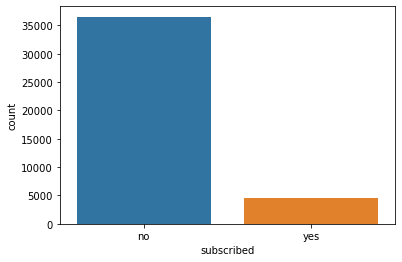

In [13]:
TARGET = 'subscribed'
(df[TARGET].value_counts() / df.shape[0] * 100).apply(lambda x: f"{round(x, 1)}%")
y=df.subscribed
ax = sns.countplot(y,label="Count")       
YES, NON = y.value_counts()
print('Number of yes ',YES/(YES+NON)*100,'%')
print('Number of no : ',NON/(NON+YES)*100,'%')

In [14]:
numericals = df.dtypes[df.dtypes != 'O'].index.tolist()

/home/etd/anaconda3/lib/python3.8/site-packages/seaborn/distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/home/etd/anaconda3/lib/python3.8/site-packages/seaborn/distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/home/etd/anaconda3/lib/python3.8/site-packages/seaborn/distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplo

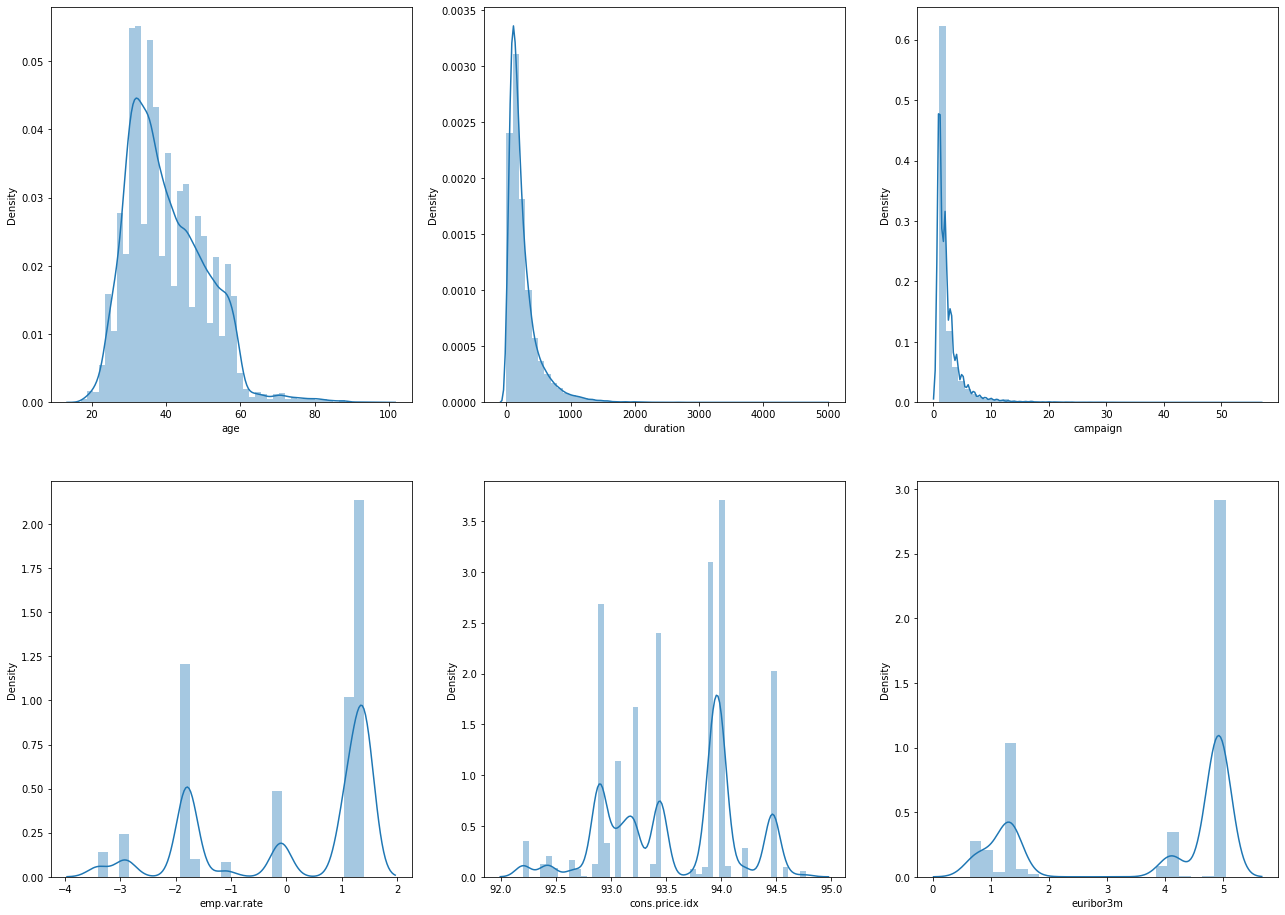

In [15]:
fig, ax = plt.subplots(2, 3, figsize=(22, 16))
sns.distplot(df['age'], ax=ax[0][0])
sns.distplot(df['duration'], ax=ax[0][1])
sns.distplot(df['campaign'], ax=ax[0][2])
sns.distplot(df['emp.var.rate'], ax=ax[1][0])
sns.distplot(df['cons.price.idx'], ax=ax[1][1])
sns.distplot(df['euribor3m'], ax=ax[1][2])
plt.show()


<AxesSubplot:>

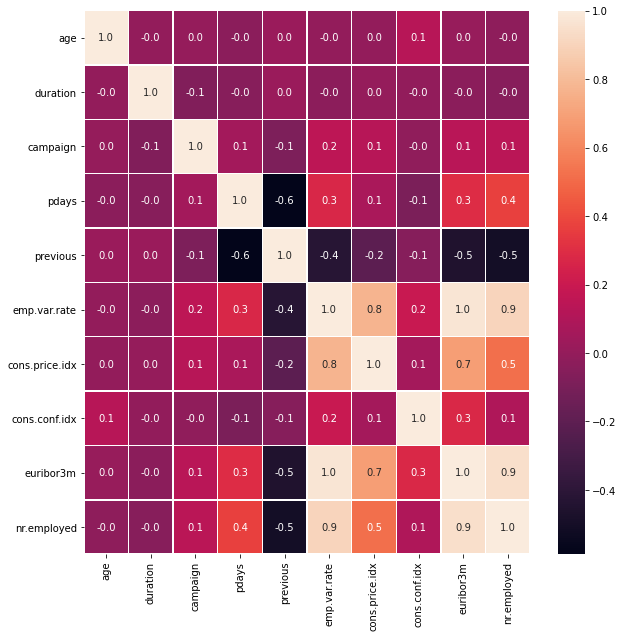

In [16]:
f,ax = plt.subplots(figsize=(10,10))
sns.heatmap(df.corr(), annot=True, linewidths=.5, fmt= '.1f',ax=ax)

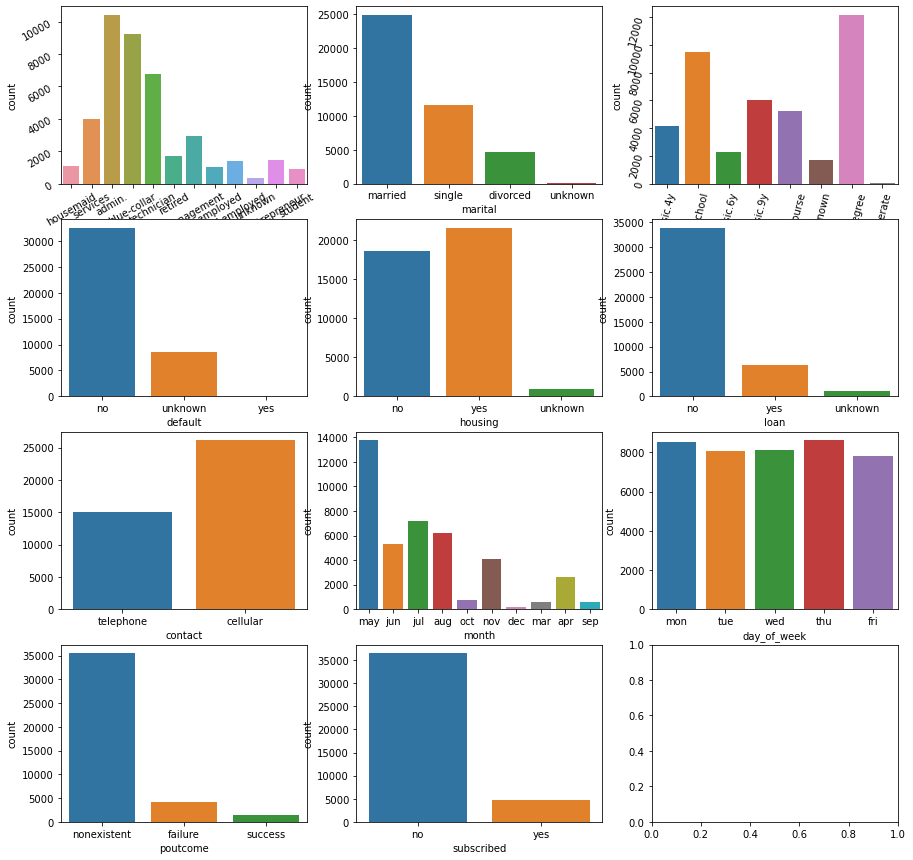

In [17]:
fig, ax = plt.subplots(4, 3, figsize=(15, 15))
sns.countplot(x=df['job'], ax=ax[0][0])
ax[0][0].tick_params(labelrotation=30)
sns.countplot(x=df['marital'], ax=ax[0][1])
sns.countplot(x=df['education'], ax=ax[0][2])
ax[0][2].tick_params(labelrotation=75)
sns.countplot(x=df['default'], ax=ax[1][0])
sns.countplot(x=df['housing'], ax=ax[1][1])
sns.countplot(x=df['loan'], ax=ax[1][2])
sns.countplot(x=df['contact'], ax=ax[2][0])
sns.countplot(x=df['month'], ax=ax[2][1])
sns.countplot(x=df['day_of_week'], ax=ax[2][2])
sns.countplot(x=df['poutcome'], ax=ax[3][0])
sns.countplot(x=df['subscribed'], ax=ax[3][1])
plt.show()


(array([0, 1, 2, 3, 4, 5, 6, 7, 8, 9]),
 [Text(0, 0, 'age'),
  Text(1, 0, 'duration'),
  Text(2, 0, 'campaign'),
  Text(3, 0, 'pdays'),
  Text(4, 0, 'previous'),
  Text(5, 0, 'emp.var.rate'),
  Text(6, 0, 'cons.price.idx'),
  Text(7, 0, 'cons.conf.idx'),
  Text(8, 0, 'euribor3m'),
  Text(9, 0, 'nr.employed')])

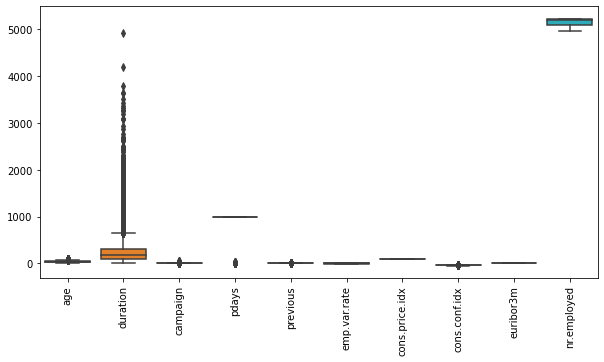

In [18]:
plt.figure(figsize=(10,5))
sns.boxplot(data=df)
plt.xticks(rotation=90)

# DATA PREPROCESSING

In [20]:
from sklearn.impute import KNNImputer


#extract categorical and numerical features
def extract_features_type(df):
    cat_col=[col for col in df.columns if df[col].dtype=='O']
    num_col=[col for col in df.columns if df[col].dtype!='O']
    return cat_col,num_col


#one hot encoding categorical variables
def one_hot_encoding(df,cat_col):
    dict={}
    for col in cat_col:
        if len(df[col].unique())>2:
            dict[col]=pd.get_dummies(df[col],drop_first=True)
    for key in dict.keys():
        df.drop(key,axis=1,inplace=True)
        df=pd.concat([df,dict[key]],axis=1)
    return df


#replace a list of strings with NAN
def replaceWNAN(df,list):
    for l in list:
        df=df.replace(l, np.nan)
    return df

#KNN IMPUTER
def knn_imput(data,k_neighbors):
    imputer = KNNImputer(n_neighbors=k_neighbors)
    data_imputer = pd.DataFrame(imputer.fit_transform(data),columns=data.columns)
    return data_imputer



In [22]:
df=replaceWNAN(df,['unknown','nonexistent'])

In [23]:
df.shape

(41188, 21)

Number of yes  88.73458288821988 %
Number of no :  11.265417111780131 %


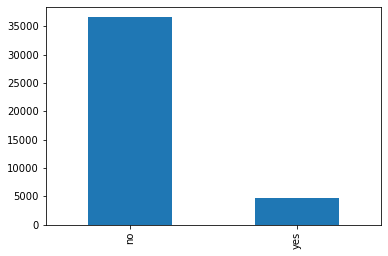

In [24]:
df['subscribed'].value_counts().plot(kind='bar')
YES, NON = df['subscribed'].value_counts()
print('Number of yes ',YES/(YES+NON)*100,'%')
print('Number of no : ',NON/(NON+YES)*100,'%')

In [25]:
#delete rows from a feature with at most 1731
df.drop(df[df['job'].isna()].index, inplace = True)
df.drop(df[df['marital'].isna()].index, inplace = True)
df.drop(df[df['education'].isna()].index, inplace = True)
df.drop(df[df['housing'].isna()].index, inplace = True)
df.drop(df[df['loan'].isna()].index, inplace = True)
df.drop('poutcome',axis=1,inplace=True)
df.drop('month',axis=1,inplace=True)
df.drop('day_of_week',axis=1,inplace=True)

In [31]:
df=df.replace('yes',1)
df=df.replace('no',0)
df=df.replace('cellular',1)
df=df.replace('telephone',0)
#df=df.replace('success',1)
#df=df.replace('failure',0)
#extract categorical and numerical features
cat_col,num_col=extract_features_type(df)

In [32]:
#categorical features encoding
## Nominal data -- onehot
## Ordinal data -- labelencoder

In [33]:
# one hot encoding categorical variables
cat_col.remove('education')
df=one_hot_encoding(df,cat_col)

In [34]:
from sklearn.preprocessing import LabelEncoder
education_level={'illiterate':0,'basic.4y':1, 'basic.6y':2,'basic.9y':3, 'high.school':4,'professional.course':5, 'university.degree':6}
df.education.replace(education_level,inplace=True)

In [35]:
df=knn_imput(df,5)

### handling outliers

In [36]:
def plot(df,col):
    fig,(ax1,ax2)=plt.subplots(2,1)
    sns.distplot(df[col],ax=ax1)
    sns.boxplot(df[col],ax=ax2)

/home/etd/anaconda3/lib/python3.8/site-packages/seaborn/distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/home/etd/anaconda3/lib/python3.8/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


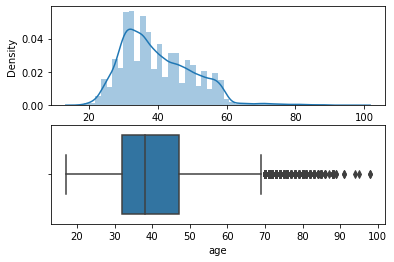

In [37]:
plot(df,'age') 

In [38]:
df.drop(df[df['age'] > 90].index, inplace = True)
df.drop(df[df['duration']>3000].index, inplace = True)
df.drop(df[df['campaign']>20].index, inplace = True)
df.drop(df[df['previous']>6].index, inplace = True)

In [39]:
#df.to_csv (r'clean_DS.csv', index = False, header=True)

# DATA NORMALISATION

In [46]:
df=pd.read_csv('clean_DS.csv')

In [47]:
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler(feature_range=(0, 1))
df = pd.DataFrame(scaler.fit_transform(df), columns=df.columns)

# FEATURE SELECTION

In [48]:
from pandas import read_csv
from sklearn.model_selection import train_test_split
from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import f_classif
from sklearn.ensemble import RandomForestClassifier
from sklearn.feature_selection import SelectFromModel
from sklearn.feature_selection import mutual_info_classif
import pandas as pd
import math

def ANOVA(df,X,y):
    fs = SelectKBest(score_func=f_classif, k=3)
    # learn relationship from training data
    X_train, X_test, y_train, y_test =train_test_split(X,y,train_size=0.3, random_state=0) 
    fs.fit(X_train, y_train)

    X_train_fs = fs.transform(X_train)
    # transform test input data
    X_test_fs = fs.transform(X_test)

    #order features
    fb={}
    for i in range(len(fs.scores_)):
        fb[df.columns[i]]=fs.scores_[i]
    sort_orders = sorted(fb.items(), key=lambda x: x[1], reverse=True)
    fb={}
    for i in range(len(fs.scores_)):
        fb[df.columns[i]]=fs.scores_[i]
    sort_orders = sorted(fb.items(), key=lambda x: x[1], reverse=True)
    subset=[]
    for i in range(0,27):
        a,b=sort_orders[i]
        if math.isnan(b)!=True:
            subset.append(a)
    return subset


def RF(X,y):
    X_train, X_test, y_train, y_test =train_test_split(X,y,train_size=0.3, random_state=0) 
    sel = SelectFromModel(RandomForestClassifier(n_estimators = 100))
    sel.fit(X_train, y_train)
    return X.columns[(sel.get_support())]

def MI(X,y,i):
    imp=pd.DataFrame(mutual_info_classif(X,y),index=X.columns)
    imp.columns=['importance']
    imp.sort_values(by='importance',ascending=False)
    best_subset=imp.sort_values(by='importance',ascending=False)[:i].index
    return best_subset
    
def set_p(s,p):
    return s[: int(p*len(s))]

In [49]:
#create X matrix and y vector
y = df['subscribed']
df.drop('subscribed',axis=1,inplace=True)
X=df

In [50]:
anova_subset=ANOVA(df,X,y)

In [52]:
rf_subset=RF(X,y)

In [54]:
mi_subset=MI(X,y,27)

In [55]:
anova_subset

['duration',
 'nr.employed',
 'pdays',
 'euribor3m',
 'emp.var.rate',
 'previous',
 'contact',
 'cons.price.idx',
 'student',
 'retired',
 'blue-collar',
 'education',
 'single',
 'campaign',
 'married',
 'cons.conf.idx',
 'services',
 'loan',
 'housemaid',
 'housing',
 'entrepreneur',
 'management',
 'age',
 'technician',
 'default',
 'unemployed',
 'self-employed']

In [56]:
rf_subset

Index(['age', 'education', 'duration', 'campaign', 'pdays', 'euribor3m',
       'nr.employed'],
      dtype='object')

In [57]:
mi_subset

Index(['duration', 'euribor3m', 'cons.price.idx', 'cons.conf.idx',
       'nr.employed', 'emp.var.rate', 'pdays', 'previous', 'contact', 'age',
       'loan', 'housing', 'retired', 'education', 'married', 'campaign',
       'technician', 'entrepreneur', 'housemaid', 'single', 'student',
       'unemployed', 'self-employed', 'services', 'blue-collar', 'default',
       'management'],
      dtype='object')

In [58]:
def inter(a,b,c):
    return list(set(a) & (set(b) | set(c)))

In [59]:
#intersection de tous les subsets
inters=inter(anova_subset[:14],rf_subset,mi_subset[:14])

In [60]:
def set_p(s,p):
    return s[: int(p*len(s))]

## Classification

In [67]:
from sklearn.metrics import classification_report
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier 
from sklearn.datasets import load_iris
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix
from sklearn.tree import export_graphviz
from six import StringIO 
from IPython.display import Image 
import pandas as pd
import numpy as np
from sklearn.neural_network import MLPClassifier
import pandas
import matplotlib.pyplot as plt
from sklearn import model_selection
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.naive_bayes import GaussianNB
from sklearn.svm import SVC
from sklearn import svm

def svm(X,y):
    clf = SVC()
    clf.fit(X, y)
    return clf

def knn(x,y,n):
    knn=KNeighborsClassifier(n_neighbors=n)
    knn.fit(x,y)
    return knn
def DT(x,y):
    dt = DecisionTreeClassifier()
    dt.fit(x, y)
    return dt
def MLP(x,y):
    clf = MLPClassifier(solver='adam',hidden_layer_sizes=(8,7,7),activation='relu',batch_size=32, max_iter=300).fit(x, y.values.ravel())
    return clf
def report(model,x_test,y_test):
    print(classification_report(y_test,model.predict(x_test)))

def LR(x,y):
    logisticRegr = LogisticRegression(C=10e10)
    logisticRegr.fit(x, y)
    return logisticRegr

#models is an array like that 
'''
models = []
models.append(('MLP', MLPClassifier(solver='adam',hidden_layer_sizes=(8,7,7),activation='relu',batch_size=32, max_iter=300)))
models.append(('KNN', KNeighborsClassifier()))
models.append(('decision tree', DecisionTreeClassifier()))
models.append(('logistic',LogisticRegression(C=10e10)))
# evaluate each model in turn'''
def COMPARE(models,x_smote,y_smote):
    seed = 7

    results = []
    names = []
    scoring = 'accuracy'
    for name, model in models:
        kfold = model_selection.KFold(n_splits=10, random_state=seed,shuffle=True)
        cv_results = model_selection.cross_val_score(model, x_smote, y_smote.values.ravel(), cv=kfold, scoring=scoring)
        results.append(cv_results)
        names.append(name)
        msg = "%s: %f (%f)" % (name, cv_results.mean(), cv_results.std())
        print(msg)
    # boxplot algorithm comparison
    fig = plt.figure()
    fig.suptitle('Algorithm Comparison')
    ax = fig.add_subplot(111)
    plt.boxplot(results)
    ax.set_xticklabels(names)
    plt.show()

## 40% MI

In [68]:
from imblearn.over_sampling import SMOTE
from xgboost import XGBClassifier

def evaluate_model(y,sub):
    smote = SMOTE()
    x_smote, y_smote = smote.fit_resample(df[sub], y)
    x_smote = pd.DataFrame(x_smote,columns=df[sub].columns)
    y_smote = pd.DataFrame(y_smote,columns=y.columns)
    data_SMOTE = pd.concat([x_smote, y_smote], axis=1)
    X_train, X_test, y_train, y_test =train_test_split(x_smote,y_smote,train_size=0.75, random_state=0) 
    MODELS=[]
    knn=knn(X_train,y_train,3)
    MODELS.append(knn)
    dt=DT(X_train,y_train)
    MODELS.append(dt)
    mlp=MLP(X_train,y_train)
    MODELS.append(mlp)
    lr=LR(X_train,y_train)
    MODELS.append(lr)
    sv=svm(X_train,y_train)
    MODELS.append(sv)
    xgb=XGBClassifier(eval_metric='error', use_label_encoder=False).fit(X_train,y_train)
    MODELS.append(xgb)
    SPACE = 30

    for model in MODELS:
        # Fit    
        # Scores
        train_roc = roc_auc_score(y_train, model.predict(X_train))
        test_roc  = roc_auc_score(y_test, model.predict(X_test))

        train_accuracy = accuracy_score(y_train, model.predict(X_train))
        test_accuracy  = accuracy_score(y_test, model.predict(X_test))

        train_precision = precision_score(y_train, model.predict(X_train))
        test_precision  = precision_score(y_test, model.predict(X_test))

        train_recall = recall_score(y_train, model.predict(X_train))
        test_recall  = recall_score(y_test, model.predict(X_test))

        # Display
        print(f"{type(model).__name__.rjust(SPACE)}:")
        print(f'{"ROC AUC".rjust(SPACE)}: TRAIN({str(round(train_roc, 3))}) & TEST({str(round(test_roc, 3))})')
        print(f'{"Accuracy".rjust(SPACE)}: TRAIN({str(round(train_accuracy, 3))}) & TEST({str(round(test_accuracy, 3))})')
        print(f'{"Precision".rjust(SPACE)}: TRAIN({str(round(train_precision, 3))}) & TEST({str(round(train_precision, 3))})')
        print(f'{"Recall".rjust(SPACE)}: TRAIN({str(round(train_recall, 3))}) & TEST({str(round(test_recall, 3))})')
        print()

In [69]:
mi1=set_p(mi_subset,0.4)

In [70]:
evaluate_model(y,mi1)

AttributeError: 'Series' object has no attribute 'columns'

# 70% mi

In [20]:
mi2=set_p(mi_subset,0.7)
evaluate_model(y,mi2)

C:\Users\ismail\anaconda3\lib\site-packages\sklearn\neighbors\_classification.py:179: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)
C:\Users\ismail\anaconda3\lib\site-packages\sklearn\utils\validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(*args, **kwargs)
C:\Users\ismail\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:765: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regress

          KNeighborsClassifier:
                       ROC AUC: TRAIN(0.959) & TEST(0.927)
                      Accuracy: TRAIN(0.959) & TEST(0.927)
                     Precision: TRAIN(0.928) & TEST(0.928)
                        Recall: TRAIN(0.994) & TEST(0.983)

        DecisionTreeClassifier:
                       ROC AUC: TRAIN(1.0) & TEST(0.918)
                      Accuracy: TRAIN(1.0) & TEST(0.918)
                     Precision: TRAIN(1.0) & TEST(1.0)
                        Recall: TRAIN(1.0) & TEST(0.924)

                 MLPClassifier:
                       ROC AUC: TRAIN(0.903) & TEST(0.896)
                      Accuracy: TRAIN(0.903) & TEST(0.897)
                     Precision: TRAIN(0.866) & TEST(0.866)
                        Recall: TRAIN(0.953) & TEST(0.947)

            LogisticRegression:
                       ROC AUC: TRAIN(0.869) & TEST(0.863)
                      Accuracy: TRAIN(0.869) & TEST(0.863)
                     Precision: TRAIN(0.864) & TEST(0

# 90% mi

In [21]:
mi3=set_p(mi_subset,0.9)
evaluate_model(y,mi3)

C:\Users\ismail\anaconda3\lib\site-packages\sklearn\neighbors\_classification.py:179: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)
C:\Users\ismail\anaconda3\lib\site-packages\sklearn\utils\validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(*args, **kwargs)
C:\Users\ismail\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:765: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regress

          KNeighborsClassifier:
                       ROC AUC: TRAIN(0.959) & TEST(0.926)
                      Accuracy: TRAIN(0.959) & TEST(0.927)
                     Precision: TRAIN(0.928) & TEST(0.928)
                        Recall: TRAIN(0.994) & TEST(0.982)

        DecisionTreeClassifier:
                       ROC AUC: TRAIN(1.0) & TEST(0.923)
                      Accuracy: TRAIN(1.0) & TEST(0.923)
                     Precision: TRAIN(1.0) & TEST(1.0)
                        Recall: TRAIN(1.0) & TEST(0.93)

                 MLPClassifier:
                       ROC AUC: TRAIN(0.903) & TEST(0.9)
                      Accuracy: TRAIN(0.903) & TEST(0.901)
                     Precision: TRAIN(0.867) & TEST(0.867)
                        Recall: TRAIN(0.951) & TEST(0.955)

            LogisticRegression:
                       ROC AUC: TRAIN(0.871) & TEST(0.871)
                      Accuracy: TRAIN(0.871) & TEST(0.871)
                     Precision: TRAIN(0.865) & TEST(0.86

# 40% anova

In [22]:
an1=set_p(anova_subset,0.4)
evaluate_model(y,mi2)

C:\Users\ismail\anaconda3\lib\site-packages\sklearn\neighbors\_classification.py:179: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)
C:\Users\ismail\anaconda3\lib\site-packages\sklearn\utils\validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(*args, **kwargs)
C:\Users\ismail\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:765: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regress

          KNeighborsClassifier:
                       ROC AUC: TRAIN(0.959) & TEST(0.927)
                      Accuracy: TRAIN(0.959) & TEST(0.927)
                     Precision: TRAIN(0.928) & TEST(0.928)
                        Recall: TRAIN(0.994) & TEST(0.984)

        DecisionTreeClassifier:
                       ROC AUC: TRAIN(1.0) & TEST(0.916)
                      Accuracy: TRAIN(1.0) & TEST(0.916)
                     Precision: TRAIN(1.0) & TEST(1.0)
                        Recall: TRAIN(1.0) & TEST(0.92)

                 MLPClassifier:
                       ROC AUC: TRAIN(0.902) & TEST(0.895)
                      Accuracy: TRAIN(0.901) & TEST(0.895)
                     Precision: TRAIN(0.86) & TEST(0.86)
                        Recall: TRAIN(0.958) & TEST(0.952)

            LogisticRegression:
                       ROC AUC: TRAIN(0.868) & TEST(0.867)
                      Accuracy: TRAIN(0.868) & TEST(0.867)
                     Precision: TRAIN(0.863) & TEST(0.86

# 70% anova

In [23]:
an2=set_p(anova_subset,0.7)
evaluate_model(y,mi2)

C:\Users\ismail\anaconda3\lib\site-packages\sklearn\neighbors\_classification.py:179: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)
C:\Users\ismail\anaconda3\lib\site-packages\sklearn\utils\validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(*args, **kwargs)
C:\Users\ismail\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:765: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regress

          KNeighborsClassifier:
                       ROC AUC: TRAIN(0.959) & TEST(0.926)
                      Accuracy: TRAIN(0.959) & TEST(0.927)
                     Precision: TRAIN(0.928) & TEST(0.928)
                        Recall: TRAIN(0.994) & TEST(0.982)

        DecisionTreeClassifier:
                       ROC AUC: TRAIN(1.0) & TEST(0.919)
                      Accuracy: TRAIN(1.0) & TEST(0.919)
                     Precision: TRAIN(1.0) & TEST(1.0)
                        Recall: TRAIN(1.0) & TEST(0.923)

                 MLPClassifier:
                       ROC AUC: TRAIN(0.893) & TEST(0.888)
                      Accuracy: TRAIN(0.893) & TEST(0.889)
                     Precision: TRAIN(0.852) & TEST(0.852)
                        Recall: TRAIN(0.949) & TEST(0.947)

            LogisticRegression:
                       ROC AUC: TRAIN(0.867) & TEST(0.863)
                      Accuracy: TRAIN(0.867) & TEST(0.863)
                     Precision: TRAIN(0.862) & TEST(0

# 90% anova

In [24]:
an3=set_p(anova_subset,0.9)
evaluate_model(y,mi2)

C:\Users\ismail\anaconda3\lib\site-packages\sklearn\neighbors\_classification.py:179: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)
C:\Users\ismail\anaconda3\lib\site-packages\sklearn\utils\validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(*args, **kwargs)
C:\Users\ismail\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:765: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regress

          KNeighborsClassifier:
                       ROC AUC: TRAIN(0.959) & TEST(0.928)
                      Accuracy: TRAIN(0.959) & TEST(0.928)
                     Precision: TRAIN(0.928) & TEST(0.928)
                        Recall: TRAIN(0.995) & TEST(0.984)

        DecisionTreeClassifier:
                       ROC AUC: TRAIN(1.0) & TEST(0.918)
                      Accuracy: TRAIN(1.0) & TEST(0.918)
                     Precision: TRAIN(1.0) & TEST(1.0)
                        Recall: TRAIN(1.0) & TEST(0.926)

                 MLPClassifier:
                       ROC AUC: TRAIN(0.9) & TEST(0.896)
                      Accuracy: TRAIN(0.9) & TEST(0.896)
                     Precision: TRAIN(0.878) & TEST(0.878)
                        Recall: TRAIN(0.928) & TEST(0.929)

            LogisticRegression:
                       ROC AUC: TRAIN(0.868) & TEST(0.867)
                      Accuracy: TRAIN(0.868) & TEST(0.867)
                     Precision: TRAIN(0.863) & TEST(0.863

## DATA BALANCING

In [17]:
from imblearn.over_sampling import SMOTE
smote = SMOTE()
y = y.to_frame()
x_smote, y_smote = smote.fit_resample(df[inters], y)
x_smote = pd.DataFrame(x_smote,columns=df[inters].columns)
y_smote = pd.DataFrame(y_smote,columns=y.columns)
data_SMOTE = pd.concat([x_smote, y_smote], axis=1)

Number of yes  50.0 %
Number of no :  50.0 %


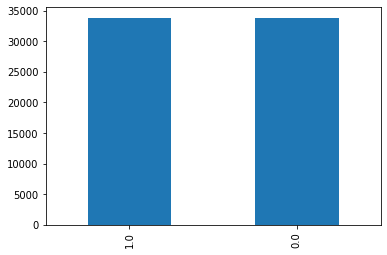

In [30]:
data_SMOTE['subscribed'].value_counts().plot(kind='bar')
YES, NON = data_SMOTE['subscribed'].value_counts()
print('Number of yes ',YES/(YES+NON)*100,'%')
print('Number of no : ',NON/(NON+YES)*100,'%')

# CLASSIFICATION

In [31]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test =train_test_split(x_smote,y_smote,train_size=0.75, random_state=0) 

In [32]:
MODELS=[]

# knn

In [34]:
knn=knn(X_train,y_train,3)

C:\Users\ismail\anaconda3\lib\site-packages\sklearn\neighbors\_classification.py:179: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)


In [35]:
score=knn.score(X_test,y_test)

print(score)

0.9191154733045587


In [36]:
report(knn,X_test,y_test)

              precision    recall  f1-score   support

         0.0       0.96      0.88      0.91      8353
         1.0       0.89      0.96      0.92      8560

    accuracy                           0.92     16913
   macro avg       0.92      0.92      0.92     16913
weighted avg       0.92      0.92      0.92     16913



In [37]:
MODELS.append(knn)

## Decision Tree

In [40]:
dt=DT(X_train,y_train)

In [41]:
score=dt.score(X_test,y_test)

print(score)

0.9086501507715958


In [42]:
report(dt,X_test,y_test)

              precision    recall  f1-score   support

         0.0       0.91      0.91      0.91      8353
         1.0       0.91      0.91      0.91      8560

    accuracy                           0.91     16913
   macro avg       0.91      0.91      0.91     16913
weighted avg       0.91      0.91      0.91     16913



In [43]:
MODELS.append(dt)

## MLP

In [44]:
mlp=MLP(X_train,y_train)

In [45]:
score=mlp.score(X_test,y_test)

print(score)

0.8873647490096376


In [46]:
report(mlp,X_test,y_test)

              precision    recall  f1-score   support

         0.0       0.95      0.81      0.88      8353
         1.0       0.84      0.96      0.90      8560

    accuracy                           0.89     16913
   macro avg       0.90      0.89      0.89     16913
weighted avg       0.90      0.89      0.89     16913



In [47]:
MODELS.append(mlp)

## LOGISTIC REGRESSION 

In [48]:
lr=LR(X_train,y_train)


C:\Users\ismail\anaconda3\lib\site-packages\sklearn\utils\validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(*args, **kwargs)


In [49]:
score=lr.score(X_test,y_test)

print(score)

0.8556140247147165


In [50]:
report(lr,X_test,y_test)

              precision    recall  f1-score   support

         0.0       0.86      0.85      0.85      8353
         1.0       0.85      0.86      0.86      8560

    accuracy                           0.86     16913
   macro avg       0.86      0.86      0.86     16913
weighted avg       0.86      0.86      0.86     16913



In [51]:
MODELS.append(lr)

## SVM

In [52]:
sv=svm(X_train,y_train)

C:\Users\ismail\anaconda3\lib\site-packages\sklearn\utils\validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(*args, **kwargs)


In [35]:
from sklearn.svm import SVC

sv = SVC()
sv.fit(X_train, y_train)


C:\Users\ismail\anaconda3\lib\site-packages\sklearn\utils\validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(*args, **kwargs)


SVC()

In [53]:
score=sv.score(X_test,y_test)

print(score)

0.8748891385324898


In [54]:
report(sv,X_test,y_test)

              precision    recall  f1-score   support

         0.0       0.91      0.83      0.87      8353
         1.0       0.85      0.92      0.88      8560

    accuracy                           0.87     16913
   macro avg       0.88      0.87      0.87     16913
weighted avg       0.88      0.87      0.87     16913



In [55]:
MODELS.append(sv)

## XGBOOST 

In [56]:
from xgboost import XGBClassifier
xgb=XGBClassifier(eval_metric='error', use_label_encoder=False).fit(X_train,y_train)


In [57]:
score=xgb.score(X_test,y_test)

print(score)

0.9380949565423047


In [58]:
report(xgb,X_test,y_test)

              precision    recall  f1-score   support

         0.0       0.95      0.92      0.94      8353
         1.0       0.92      0.96      0.94      8560

    accuracy                           0.94     16913
   macro avg       0.94      0.94      0.94     16913
weighted avg       0.94      0.94      0.94     16913



In [59]:
MODELS.append(xgb)

# COMPARAISON ENTRE NOS MODELES

In [50]:
SPACE = 30

for model in MODELS:
    # Fit    
    # Scores
    train_roc = roc_auc_score(y_train, model.predict(X_train))
    test_roc  = roc_auc_score(y_test, model.predict(X_test))
    
    train_accuracy = accuracy_score(y_train, model.predict(X_train))
    test_accuracy  = accuracy_score(y_test, model.predict(X_test))
    
    train_precision = precision_score(y_train, model.predict(X_train))
    test_precision  = precision_score(y_test, model.predict(X_test))
    
    train_recall = recall_score(y_train, model.predict(X_train))
    test_recall  = recall_score(y_test, model.predict(X_test))
    
    # Display
    print(f"{type(model).__name__.rjust(SPACE)}:")
    print(f'{"ROC AUC".rjust(SPACE)}: TRAIN({str(round(train_roc, 3))}) & TEST({str(round(test_roc, 3))})')
    print(f'{"Accuracy".rjust(SPACE)}: TRAIN({str(round(train_accuracy, 3))}) & TEST({str(round(test_accuracy, 3))})')
    print(f'{"Precision".rjust(SPACE)}: TRAIN({str(round(train_precision, 3))}) & TEST({str(round(train_precision, 3))})')
    print(f'{"Recall".rjust(SPACE)}: TRAIN({str(round(train_recall, 3))}) & TEST({str(round(test_recall, 3))})')
    print()

          KNeighborsClassifier:
                       ROC AUC: TRAIN(0.935) & TEST(0.907)
                      Accuracy: TRAIN(0.934) & TEST(0.907)
                     Precision: TRAIN(0.901) & TEST(0.901)
                        Recall: TRAIN(0.975) & TEST(0.956)

        DecisionTreeClassifier:
                       ROC AUC: TRAIN(1.0) & TEST(0.917)
                      Accuracy: TRAIN(1.0) & TEST(0.917)
                     Precision: TRAIN(1.0) & TEST(1.0)
                        Recall: TRAIN(0.999) & TEST(0.917)

                 MLPClassifier:
                       ROC AUC: TRAIN(0.886) & TEST(0.881)
                      Accuracy: TRAIN(0.886) & TEST(0.882)
                     Precision: TRAIN(0.852) & TEST(0.852)
                        Recall: TRAIN(0.932) & TEST(0.933)

            LogisticRegression:
                       ROC AUC: TRAIN(0.858) & TEST(0.856)
                      Accuracy: TRAIN(0.858) & TEST(0.856)
                     Precision: TRAIN(0.857) & TEST

MLP: 0.886552 (0.005890)
KNN: 0.915302 (0.003634)
decision tree: 0.919219 (0.002845)
logistic: 0.857550 (0.003990)
xgboost: 0.941169 (0.002146)
SVM: 0.877624 (0.002750)


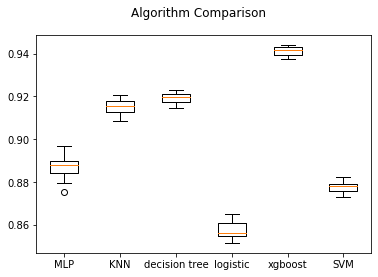

In [52]:

# load dataset
# prepare configuration for cross validation test harness
seed = 7
# prepare models
models = []
models.append(('MLP', MLPClassifier(solver='adam',hidden_layer_sizes=(8,7,7),activation='relu',batch_size=32, max_iter=300)))
models.append(('KNN', KNeighborsClassifier()))
models.append(('decision tree', DecisionTreeClassifier()))
models.append(('logistic',LogisticRegression(C=10e10)))
models.append(('xgboost',XGBClassifier(eval_metric='error', use_label_encoder=False)))
models.append(('SVM',SVC()))

# evaluate each model in turn
results = []
names = []
scoring = 'accuracy'
for name, model in models:
    kfold = model_selection.KFold(n_splits=10, random_state=seed,shuffle=True)
    cv_results = model_selection.cross_val_score(model, x_smote, y_smote.values.ravel(), cv=kfold, scoring=scoring)
    results.append(cv_results)
    names.append(name)
    msg = "%s: %f (%f)" % (name, cv_results.mean(), cv_results.std())
    print(msg)
# boxplot algorithm comparison
fig = plt.figure()
fig.suptitle('Algorithm Comparison')
ax = fig.add_subplot(111)
plt.boxplot(results)
ax.set_xticklabels(names)
plt.show()

In [181]:
#BORDA COUNT VOTING APPROACH
from sklearn.metrics import f1_score
def BC(m):
    RESULT={}
    res=[]
    for name,model in m:
        RESULT[name]=0
        T=[]
        test_roc  = roc_auc_score(y_test, model.predict(X_test))
        T.append(test_roc)
        
        test_accuracy  = accuracy_score(y_test, model.predict(X_test))
        T.append(test_accuracy)
        test_precision  = precision_score(y_test, model.predict(X_test))
        T.append(test_precision)
        test_recall  = recall_score(y_test, model.predict(X_test))
        T.append(test_recall)
        fscore=f1_score(y_test, model.predict(X_test), average='macro')
        T.append(fscore)
        res.append(T)
    res=np.array(res)
    for j in range(5):
        temp=res[:,j]
        sor=temp.copy()
        sor.sort()
        sor=sor[::-1]
        gain=100
        for e in sor:
            RESULT[list(RESULT.keys())[list(temp).index(e)]]+=gain
            gain-=10
    return {k: v for k, v in sorted(RESULT.items(), key=lambda item: item[1],reverse=True)}
            
            
        
        

In [182]:
models = []
models.append(('MLP', mlp))
models.append(('KNN', knn))
models.append(('decision tree',dt))
models.append(('logistic',lr))
models.append(('xgboost',xgb))
models.append(('SVM',sv))


In [183]:
BC(models)

{'xgboost': 480,
 'KNN': 450,
 'decision tree': 390,
 'MLP': 350,
 'SVM': 310,
 'logistic': 270}